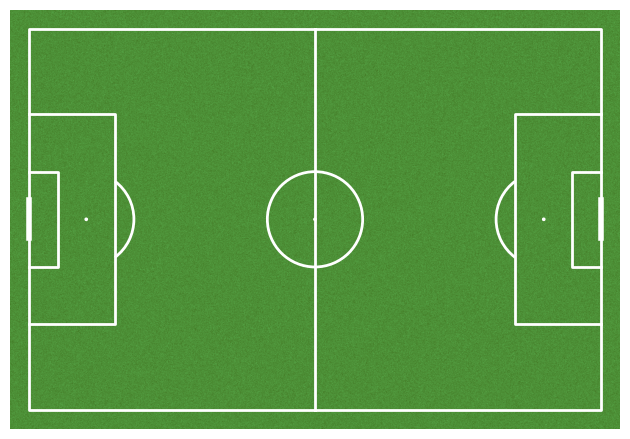

In [1]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
# Create a pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw()
plt.show() 

In [2]:
from kloppy import statsbomb

In [3]:
import glob
import pandas as pd

In [4]:
import os
print(os.getcwd())


/Users/mac/Desktop/MAST397/MAST397


In [5]:
import json

with open("open-data-master/data/matches/16/1.json", "r") as f:
    matches = json.load(f)

print(f"Loaded {len(matches)} matches")
# Load matches data from StatsBomb open data


for m in matches:
    home = m["home_team"]["home_team_name"]
    away = m["away_team"]["away_team_name"]
    print(f"{home} vs {away}")



Loaded 1 matches
Real Madrid vs Liverpool


In [6]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("aleespinosa/soccer-match-event-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/mac/.cache/kagglehub/datasets/aleespinosa/soccer-match-event-dataset/versions/17


In [7]:
# List files in the dataset directory
import os

dataset_path = "/Users/mac/.cache/kagglehub/datasets/aleespinosa/soccer-match-event-dataset/versions/17"

files = os.listdir(dataset_path)
print(files)


['matches_Germany.csv', 'matches_Spain.csv', 'events_Spain.csv', 'labels.csv', 'competitions.csv', 'teams.csv', 'referees.csv', 'matches_European_Championship.csv', 'coaches.csv', 'matches_Italy.csv', 'events_Italy.csv', 'matches_France.csv', 'events_England.csv', 'events_World_Cup.csv', 'matches_World_Cup.csv', 'players.csv', 'games.csv', 'events_Germany.csv', 'playerank.csv', 'events_France.csv', 'features.csv', 'matches_England.csv', 'player_games.csv', 'tags2name.csv', 'eventid2name.csv', 'events_European_Championship.csv', 'actions.csv']


In [8]:
#filter for Real Madrid matches
import pandas as pd

# Load the Spain matches CSV
matches = pd.read_csv("/Users/mac/.cache/kagglehub/datasets/aleespinosa/soccer-match-event-dataset/versions/17/matches_Spain.csv")

# Check the first few rows to see column names
print(matches.head())




   status  roundId  gameweek  \
0  Played  4406122        38   
1  Played  4406122        38   
2  Played  4406122        38   
3  Played  4406122        38   
4  Played  4406122        38   

                                           teamsData  seasonId  \
0  {'676': {'scoreET': 0, 'coachId': 92894, 'side...    181144   
1  {'679': {'scoreET': 0, 'coachId': 3427, 'side'...    181144   
2  {'691': {'scoreET': 0, 'coachId': 444778, 'sid...    181144   
3  {'674': {'scoreET': 0, 'coachId': 210074, 'sid...    181144   
4  {'675': {'scoreET': 0, 'coachId': 275283, 'sid...    181144   

               dateutc  winner                        venue     wyId  \
0  2018-05-20 18:45:00     676                     Camp Nou  2565922   
1  2018-05-20 16:30:00       0  Estadio Wanda Metropolitano  2565925   
2  2018-05-20 14:15:00     691        San Mam\u00e9s Barria  2565919   
3  2018-05-20 10:00:00     674          Estadio de Mestalla  2565924   
4  2018-05-19 18:45:00       0  Estadio de la Cer\

In [12]:
import pandas as pd

teams = pd.read_csv("/Users/mac/.cache/kagglehub/datasets/aleespinosa/soccer-match-event-dataset/versions/17/teams.csv")

# Quick check
print(teams.head())


#Find Real Madrid team ID
real_madrid_id = teams[teams['name'] == 'Real Madrid']['wyId'].values[0]
print(real_madrid_id)



                  city                   name  wyId  \
0  Newcastle upon Tyne       Newcastle United  1613   
1                 Vigo          Celta de Vigo   692   
2            Barcelona               Espanyol   691   
3      Vitoria-Gasteiz  Deportivo Alav\u00e9s   696   
4             Valencia                Levante   695   

                   officialName  \
0           Newcastle United FC   
1       Real Club Celta de Vigo   
2  Reial Club Deportiu Espanyol   
3         Deportivo Alav\u00e9s   
4                    Levante UD   

                                                area  type  
0  {'name': 'England', 'id': '0', 'alpha3code': '...  club  
1  {'name': 'Spain', 'id': '724', 'alpha3code': '...  club  
2  {'name': 'Spain', 'id': '724', 'alpha3code': '...  club  
3  {'name': 'Spain', 'id': '724', 'alpha3code': '...  club  
4  {'name': 'Spain', 'id': '724', 'alpha3code': '...  club  
675


In [11]:
#Find matches that involve Real Madrid
real_madrid_id = 675 

# Filter matches where Real Madrid played
rm_matches = matches[
    (matches['team1.teamId'] == real_madrid_id) | 
    (matches['team2.teamId'] == real_madrid_id)
]

# Show the match IDs
print(rm_matches['wyId'])



4      2565927
12     2565912
20     2565882
23     2565907
38     2565891
54     2565876
60     2565867
73     2565852
87     2565847
90     2565836
108    2565818
115    2565812
129    2565799
137    2565796
140    2565707
142    2565780
156    2565772
166    2565766
178    2565749
184    2565738
198    2565733
202    2565723
213    2565711
237    2565695
245    2565687
257    2565673
265    2565664
270    2565657
284    2565644
292    2565633
307    2565619
310    2565609
328    2565598
334    2565596
341    2565583
358    2565571
360    2565564
372    2565555
Name: wyId, dtype: int64


In [13]:
import pandas as pd

events = pd.read_csv("/Users/mac/.cache/kagglehub/datasets/aleespinosa/soccer-match-event-dataset/versions/17/events_Spain.csv")

# See the first few rows and column names
print(events.head())
print(events.columns)


   eventId subEventName            tags  playerId  \
0        8  Simple pass  [{'id': 1801}]      3542   
1        8  Simple pass  [{'id': 1801}]    274435   
2        8  Simple pass  [{'id': 1801}]    364860   
3        8  Simple pass  [{'id': 1801}]      3534   
4        8  Simple pass  [{'id': 1801}]      3695   

                                  positions  matchId eventName  teamId  \
0  [{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]  2565548      Pass     682   
1  [{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]  2565548      Pass     682   
2  [{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]  2565548      Pass     682   
3  [{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]  2565548      Pass     682   
4  [{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]  2565548      Pass     682   

  matchPeriod   eventSec  subEventId         id tagsList  pos_orig_y  \
0          1H   2.994582        85.0  180864419   [1801]          61   
1          1H   3.137020        85.0  180864418   [1801]          50   
2          1H   6.70

In [15]:
rm_events = events[events['matchId'].isin(rm_matches['wyId'])]

# Optional: see the first few events
print(rm_events.head())


       eventId subEventName            tags  playerId  \
11178        8  Simple pass  [{'id': 1801}]      3321   
11179        8  Simple pass  [{'id': 1801}]     14723   
11180        8  Simple pass  [{'id': 1801}]      8287   
11181        8  Simple pass  [{'id': 1801}]      4501   
11182        8  Simple pass  [{'id': 1801}]      8287   

                                      positions  matchId eventName  teamId  \
11178  [{'y': 51, 'x': 48}, {'y': 36, 'x': 40}]  2565555      Pass     675   
11179  [{'y': 36, 'x': 40}, {'y': 70, 'x': 36}]  2565555      Pass     675   
11180  [{'y': 70, 'x': 36}, {'y': 95, 'x': 33}]  2565555      Pass     675   
11181  [{'y': 95, 'x': 33}, {'y': 68, 'x': 38}]  2565555      Pass     675   
11182  [{'y': 68, 'x': 38}, {'y': 36, 'x': 26}]  2565555      Pass     675   

      matchPeriod   eventSec  subEventId         id tagsList  pos_orig_y  \
11178          1H   1.818886        85.0  180467997   [1801]          36   
11179          1H   5.179896        

In [16]:
#Event data for any Real Madrid match
rm_events.to_csv("RealMadrid_events.csv", index=False)


In [17]:
#Isolated only real madrid event data from those matches
real_madrid_id = 675  # Real Madrid team ID

rm_only_events = rm_events[rm_events['teamId'] == real_madrid_id]

rm_only_events.to_csv("RealMadrid_only_events.csv", index=False)


In [18]:
# Filter only shots
shots = rm_only_events[rm_only_events['eventId'] == 10]

# See how many shots there are
print(f"Total shots: {len(shots)}")


Total shots: 629


In [19]:
import pandas as pd

# Load the players CSV
players = pd.read_csv("/Users/mac/.cache/kagglehub/datasets/aleespinosa/soccer-match-event-dataset/versions/17/players.csv")

ronaldo_id = players[players['shortName'].str.contains('Cristiano Ronaldo', case=False, na=False)]['wyId'].values[0]
print("Cristiano Ronaldo's player ID:", ronaldo_id)


Cristiano Ronaldo's player ID: 3322


In [20]:
ronaldo_shots = shots[shots['playerId'] == ronaldo_id]

# Quick check
print(ronaldo_shots.head())
print(f"Total shots by Ronaldo: {len(ronaldo_shots)}")


       eventId subEventName  \
76414       10         Shot   
76589       10         Shot   
76959       10         Shot   
77121       10         Shot   
77207       10         Shot   

                                                    tags  playerId  \
76414  [{'id': 402}, {'id': 2101}, {'id': 201}, {'id'...      3322   
76589  [{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...      3322   
76959  [{'id': 1901}, {'id': 402}, {'id': 201}, {'id'...      3322   
77121  [{'id': 403}, {'id': 201}, {'id': 1214}, {'id'...      3322   
77207  [{'id': 1901}, {'id': 402}, {'id': 2101}, {'id...      3322   

                                    positions  matchId eventName  teamId  \
76414  [{'y': 27, 'x': 91}, {'y': 0, 'x': 0}]  2565596      Shot     675   
76589  [{'y': 48, 'x': 96}, {'y': 0, 'x': 0}]  2565596      Shot     675   
76959  [{'y': 66, 'x': 86}, {'y': 0, 'x': 0}]  2565596      Shot     675   
77121  [{'y': 48, 'x': 88}, {'y': 0, 'x': 0}]  2565596      Shot     675   
77207  [{'y'

In [24]:
# List all unique tags in shots
unique_tags = set()
for tags in shots['tagsList']:
    if pd.notna(tags):
        for tag in eval(tags):  # convert string representation of list to actual list
            unique_tags.add(tag)
print(unique_tags)


{1801, 1802, 401, 402, 403, 1201, 1202, 1203, 1204, 2101, 1205, 1206, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1207, 1218, 1220, 1219, 1221, 1223, 1222, 201, 101, 1901, 1401}


In [25]:
# Shots that were on target (goal or saved)
on_target_shots = shots[shots['tagsList'].apply(lambda x: 101 in eval(x) or 201 in eval(x))]

# Shots that were not on target
off_target_shots = shots[~shots.index.isin(on_target_shots.index)]


In [27]:
# Load tags (update the path if needed)
tags_df = pd.read_csv("/Users/mac/.cache/kagglehub/datasets/aleespinosa/soccer-match-event-dataset/versions/17/tags2name.csv")

# Check column names
print(tags_df.columns)

Index(['Tag', 'Label', 'Description'], dtype='object')
